# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv(r'C:\Users\hhtph\Documents\Heather\Big Data Classes\Unit8\human_body_temperature.csv')

In [233]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [234]:
plt.hist(df['temperature'])
#plt.axis.get_major_locator.set_params(ticks=12)
plt.locator_params(nbins=12)
#plt.xticks(np.arange(min(x),max(x+1),1.0))
plt.xticks(rotation='vertical')
#plt.x.set_major_locator(plt.ManNLocator(10))

(array([  96. ,   96.5,   97. ,   97.5,   98. ,   98.5,   99. ,   99.5,
         100. ,  100.5,  101. ,  101.5]),
 <a list of 12 Text xticklabel objects>)

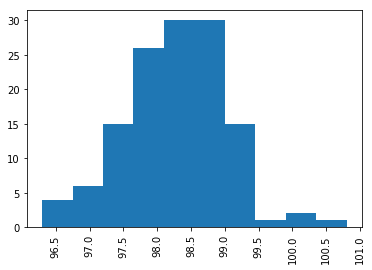

In [235]:
# Show histogram of body temperatures
plt.show()

In [236]:
#Compute mean of body temperatures
temp_mean = np.mean(df['temperature'])

In [237]:
print(temp_mean)

98.24923076923078


In [238]:
#Compute mode of body temperatures
stats.mode(df['temperature'])

ModeResult(mode=array([ 98.]), count=array([11]))

In [239]:
#Compute median of body temperatures
df['temperature'].median

<bound method Series.median of 0       99.3
1       98.4
2       97.8
3       99.2
4       98.0
5       99.2
6       98.0
7       98.8
8       98.4
9       98.6
10      98.8
11      96.7
12      98.2
13      98.7
14      97.8
15      98.8
16      98.3
17      98.2
18      97.2
19      99.4
20      98.3
21      98.2
22      98.6
23      98.4
24      97.8
25      98.0
26      97.8
27      98.2
28      98.4
29      98.1
       ...  
100     99.0
101     98.5
102     98.0
103     99.4
104     97.6
105     96.7
106     97.0
107     98.6
108     98.7
109     97.3
110     98.8
111     98.0
112     98.2
113     99.1
114     99.0
115     98.0
116    100.8
117     97.8
118     98.7
119     98.4
120     97.7
121     97.9
122     99.0
123     97.2
124     97.5
125     96.3
126     97.7
127     98.2
128     97.9
129     98.7
Name: temperature, Length: 130, dtype: float64>

In [240]:
# Q1: is the distribution of body temperatures normal?

# A1: the distribution of body temperatures is normal because the data are relatively symetrical about
# the mean of 98.2, and the mean, mode, and median are close in value numerically.

In [241]:
sample_stdev=np.std(df['temperature'])

In [242]:
print(sample_stdev)

0.7303577789050377


In [243]:
# Q2: is the sample size large?

# A2: The sample size is large because it is unimodal, slightly skewed without outliers and with
# a sample size greater than 40. (http://www.statisticshowto.com/large-enough-sample-condition/)

# Q: Are the observations independent?
# A: Observation independence is determined by how the observations were collected. We don't have
#  any information about how the observations were collected.

In [244]:
# Q3: Is the true population mean really 98.6 deg?

# A3: A one sample t-test determines if a sample mean differs from the population mean. We are
#  comparing the sample mean with 98.6 deg, therefore a one sample t-test is appropriate.

In [245]:
stats.t.ppf(1-0.025, 131) # t critical

1.9782385392112583

In [246]:
# If the null hypothesesis is that the true population of the mean is 98.6 deg, and a two tailed t 
# test is performed, we have a t critical of 0.05 for a 95% confidence and 0.10 for a 90% confidence.

In [248]:
stats.ttest_1samp(a=df['temperature'], popmean = 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [249]:
# The p value is very small indicating that the true mean of 98.6 and the sample mean of 98.2 are not
# significantly different.

In [250]:
# Q: z=test or t-test?
# A: if we assume that the central limit theorem holds and the sample size is sufficiently large, than
#  either the t test or z test may be used.

In [251]:
stats.norm.ppf(q=0.975) # z critical

1.959963984540054

In [252]:
# For the temperatures, t critical =  1.98 and z critical = 1.96. The t and z statistic is the same
# and equals -5.45.

In [253]:
# Q4: Draw a random sample of 10 values. Compute z and t statistics and compare.

In [295]:
random_sample = np.random.choice(df['temperature'],10, replace = False)

In [296]:
print(random_sample)

[ 99.1  98.4  98.4  98.   97.5  98.1  97.2  98.6  98.   97.6]


In [297]:
small_sample_mean = np.mean(random_sample)

In [298]:
print(small_sample_mean)

98.09


In [299]:
print(float(small_sample_mean))

98.09


In [300]:
np.std(random_sample)

0.53563046963368222

In [301]:
stats.ttest_1samp(a=random_sample, popmean = temp_mean) # t test on random sample

Ttest_1sampResult(statistic=-0.89183184074463939, pvalue=0.39570070847976391)

In [302]:
stats.ttest_1samp(a=random_sample, popmean = 98.6)   #z test on random sample 

Ttest_1sampResult(statistic=-2.8564469102109515, pvalue=0.018889521637310395)

In [303]:
# Now the test statistics, z and t, are different because they are based on different population means

In [263]:
# Q5: What is the temperature that would be considered abnormal. Compute confidence interval

In [264]:
conf_int=stats.norm.interval(0.95, loc= temp_mean, scale = sample_stdev)

In [265]:
print(conf_int)

(96.81775582674824, 99.680705711713316)


In [266]:
# There is a 5% chance that the mean lies outside the interval [96.8, 99.7]. With a 95% confidence, an 
# abnormal temperature would lie outside this interval.

In [267]:
# Q6: Compare the data for Male and Female. Is there a significant difference?

In [268]:
df_genderF = df.loc[df['gender'] == ('F')]

In [269]:
df_genderM = df.loc[df['gender'] == ('M')]

In [270]:
df_genderF.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


In [271]:
df_genderM.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


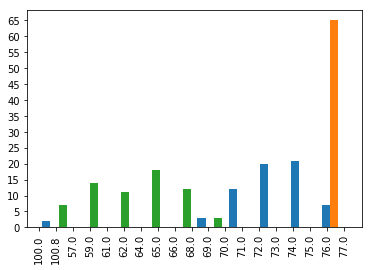

In [272]:
plt.hist(df_genderF)
plt.locator_params(nbins=20)
plt.xticks(rotation='vertical')
plt.show()

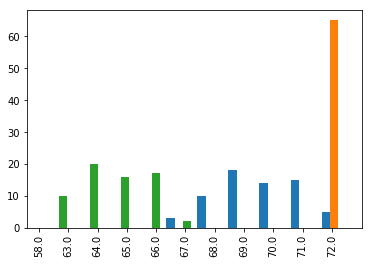

In [273]:
plt.hist(df_genderM)
plt.locator_params(nbins=12)
plt.xticks(rotation='vertical')
plt.show()

In [278]:
stats.ttest_ind(df_genderF['temperature'], df_genderM['temperature'], axis=0, equal_var=True)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

In [ ]:
# A6: Because the distributions of the data look similar meaning that the variance is similar, 
#  a two sided t-test can be used.

#  Because the p-value is small, 2%, we cannot reject the null hypothesis, and therefore the 
#  averages for the Male and Female group temperatures do not differ significantly.

In [ ]:
# The body temperature of 98.6 degrees F was conceptualized by Carl Wunderlich in 168. We explored
# this premise with 130 data points from 65 men and 65 women.
# The sample was determined to be normal as it was distributed relatively symetrically about the mean
# mode, and median were close numerically.
# The given sample was determined to be large because it is unimodal with a sample size greater than
# 40.
# A t test was used to evaluate if the sample mean was significantly different than the population
# mean, 98.6. The means were not significantly different.
# A z test or t test may be used in this case because the central limit theorem holds and the sample
# size is considered large.
# When the sample population is sampled again with a sample size of 10 we find that for a t test 
# comparing the n=10 sample mean with the n=130 sample mean and for a z testcomparing the n=10
# sample mean with the population mean of 98.6, the p values indicate weak evidence against the null
# hypothesis, so we fail to reject the null hypothesis that the means are statistically the same.
# To determine what an abnormal temperature would be, a 95% confidence interval of the sample data 
# was taken. The 95% confidence interval includes the values from 96.8 deg F to 99.6 deg F. 
# Temperatures outside of this range can be considered abnormal.
# Finally we compared the temperature data for men and women. Because the distributions were similar
# in shape we can clude that the variances will be similar in shape and we can use a two sided t test.
# The results indicate that the averages of male and female temperatures do not differ significantly.